### **Data Exploration Method 3**
Steph Curry Regular Season PPG Analysis

In [ ]:
# Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

regular = pd.read_csv("Stephen Curry Regularseason Stats.csv")

print("Dataset shape:", regular.shape)
print("\nColumns:", regular.columns.tolist())
print("\nFirst few rows:")
regular


Dataset shape: (881, 27)

Columns: ['Season_year', 'Season_div', 'Date', 'OPP', 'Result', 'T Score', 'O Score', 'MIN', 'FG', 'FGM', 'FGA', 'FG%', '3PT', '3PTM', '3PTA', '3P%', 'FT', 'FTM', 'FTA', 'FT%', 'REB', 'AST', 'BLK', 'STL', 'PF', 'TO', 'PTS']

First few rows:


,Season_year,Season_div,Date,OPP,Result,T Score,O Score,MIN,FG,FGM,...,FTM,FTA,FT%,REB,AST,BLK,STL,PF,TO,PTS
0,2009-2010,Regular,Wed 4/14,POR,W,122,116,48.0,13-25,13,...,12,12,100.0,9,8,1,2,0,2,42
1,2009-2010,Regular,Tue 4/13,UTA,L,94,103,41.0,5-15,5,...,6,6,100.0,5,6,0,2,4,2,17
2,2009-2010,Regular,Sun 4/11,OKC,W,120,117,35.0,9-16,9,...,4,6,66.7,7,7,0,1,2,5,25
3,2009-2010,Regular,Sat 4/10,LAC,L,104,107,41.0,10-19,10,...,4,4,100.0,9,4,0,3,5,3,29
4,2009-2010,Regular,Wed 4/7,MIN,W,116,107,44.0,12-22,12,...,0,0,0.0,8,14,0,7,4,4,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,2022-2023,Regular,Thu 10/27,MIA,W,123,110,37.0,13-22,13,...,0,0,0.0,7,9,0,1,0,3,33
877,2022-2023,Regular,Tue 10/25,PHX,L,105,134,30.0,7-17,7,...,3,5,60.0,7,8,0,1,1,1,21
878,2022-2023,Regular,Sun 10/23,SAC,W,130,125,31.0,11-22,11,...,4,4,100.0,5,2,0,1,3,2,33
879,2022-2023,Regular,Fri 10/21,DEN,L,123,128,36.0,10-22,10,...,9,9,100.0,5,4,0,0,2,3,34


Conversions, Grouping, and Data

In [ ]:
# Check unique seasons and data quality
print("Seasons:", sorted(regular['Season_year'].unique()))
print("\nSeasons with data:", regular['Season_year'].nunique())
print("\nMissing values:")
print(regular[['Season_year', 'PTS']].isnull().sum())

regular['PTS'] = pd.to_numeric(regular['PTS'], errors='coerce')

season_stats = regular.groupby('Season_year').agg({
    'PTS': ['sum', 'mean', 'count'],
    'MIN': 'mean'
}).round(2)

season_stats.columns = ['Total_Points', 'PPG', 'Games_Played', 'Avg_Minutes']
season_stats = season_stats.reset_index()

print("\nSeason-level statistics:")
season_stats


Seasons: ['2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022', '2022-2023']

Seasons with data: 14

Missing values:
Season_year    0
PTS            0
dtype: int64

Season-level statistics:


,Season_year,Total_Points,PPG,Games_Played,Avg_Minutes
0,2009-2010,1399,17.49,80,36.19
1,2010-2011,1373,18.55,74,33.68
2,2011-2012,383,15.32,25,29.12
3,2012-2013,1786,22.90,78,38.29
4,2013-2014,1873,24.01,78,36.45
5,2014-2015,1900,23.75,80,32.66
6,2015-2016,2375,30.06,79,34.24
7,2016-2017,1999,25.30,79,33.39
8,2017-2018,1346,26.39,51,31.98
9,2018-2019,1881,27.26,69,33.75


In [ ]:
# Summary statistics for PPG
summary_ppg = season_stats['PPG'].describe()
print("Stephen Curry Points Per Game Summary (Career):")
print(summary_ppg)
print(f"\nCareer High PPG: {season_stats['PPG'].max():.1f} ({season_stats.loc[season_stats['PPG'].idxmax(), 'Season_year']})")
print(f"Career Low PPG: {season_stats['PPG'].min():.1f} ({season_stats.loc[season_stats['PPG'].idxmin(), 'Season_year']})")
print(f"Career Average PPG: {season_stats['PPG'].mean():.1f}")

# MVP seasons
mvp_seasons = ['2014-2015', '2015-2016']
injury_seasons = ['2019-2020', '2020-2021']  # Seasons with significant injuries

season_stats['Period'] = season_stats['Season_year'].apply(lambda x: 
    'MVP Era' if x in mvp_seasons else 
    'Injury/Recovery' if x in injury_seasons else 
    'Early Career' if x <= '2013-2014' else 
    'Prime Era'
)


Stephen Curry Points Per Game Summary (Career):
count    14.000000
mean     24.193571
std       4.871365
min      15.320000
25%      21.325000
50%      24.655000
75%      27.042500
max      31.980000
Name: PPG, dtype: float64

Career High PPG: 32.0 (2020-2021)
Career Low PPG: 15.3 (2011-2012)
Career Average PPG: 24.2


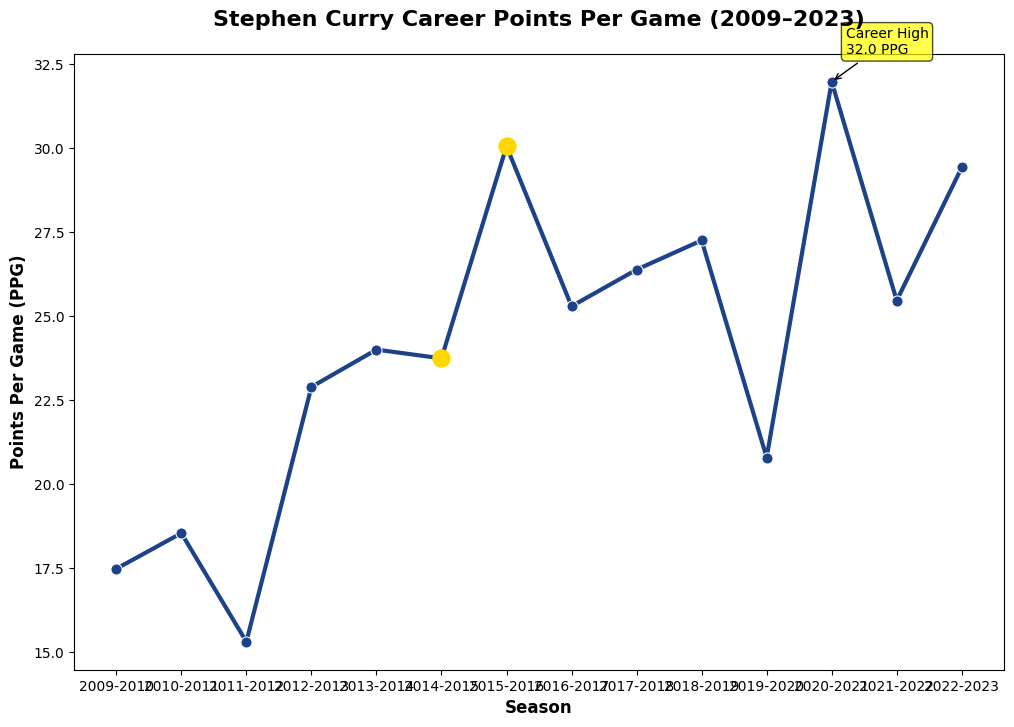

In [ ]:
plt.figure(figsize=(16, 8))

sns.lineplot(data=season_stats, x='Season_year', y='PPG', marker='o', 
             color='#1D428A', linewidth=3, markersize=8)

# MVP seasons
mvp_data = season_stats[season_stats['Season_year'].isin(mvp_seasons)]
plt.scatter(mvp_data['Season_year'], mvp_data['PPG'], 
           color='gold', s=150, zorder=5, label='MVP Seasons')

# Title and Labels
plt.title("Stephen Curry Career Points Per Game (2009–2023)", 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Season", fontsize=12, fontweight='bold')
plt.ylabel("Points Per Game (PPG)", fontsize=12, fontweight='bold')

# Annotations
max_ppg_season = season_stats.loc[season_stats['PPG'].idxmax()]
plt.annotate(f'Career High\n{max_ppg_season["PPG"]:.1f} PPG', 
            xy=(max_ppg_season['Season_year'], max_ppg_season['PPG']),
            xytext=(10, 20), textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.show()
